In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import os
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))

2023-04-14 13:57:40.157603: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


1


2023-04-14 13:58:01.177875: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-14 13:58:01.465354: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-14 13:58:01.923163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-14 13:58:01.923945: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-04-14 13:58:01.924108: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-14 13:58:02.571457: I tensorflow/stream_executor/platform/def

In [2]:
## Defining batch specfications
batch_size = 50
img_height = 256
img_width = 256

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range = 0.2,
)
train_generator = train_datagen.flow_from_directory(
        'dataset/plant_diseases_datase/New Plant Diseases Dataset(Augmented)/train',
        target_size=(img_height,img_width),
        batch_size=batch_size,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 46356 images belonging to 25 classes.


In [5]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator =  valid_datagen.flow_from_directory(
   'dataset/plant_diseases_datase/New Plant Diseases Dataset(Augmented)/valid',
    target_size= (img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse"
)

Found 11588 images belonging to 25 classes.


In [11]:
import json
with open('label.json','w') as f:
    json.dump(train_generator.class_indices,f)

In [17]:
file = open('label.json','r')
temp = json.loads(file.read())
temp= list(temp.keys())
temp[0]

'Apple___Apple_scab'

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
#training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
# Defining Cnn
model = tf.keras.models.Sequential([
    layers.Conv2D(32, 3, activation='relu',input_shape=(256,256,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

     layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(len(class_names), activation= 'softmax')
])

2023-04-14 14:00:01.282880: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 14:00:01.283735: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-14 14:00:01.284170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-14 14:00:01.284405: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43Gi

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [11]:
# lets train our CNN
history = model.fit(train_generator,validation_data=valid_generator,callbacks=callbacks,epochs = 40)

2023-04-14 14:00:28.426916: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-14 14:00:28.428016: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800500000 Hz


Epoch 1/40


2023-04-14 14:00:29.771241: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-14 14:00:32.909439: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-14 14:00:39.549448: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-04-14 14:00:39.624802: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-14 14:00:41.214379: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-04-14 14:0

928/928 [==============================] - ETA: 0s - loss: 2.7777 - accuracy: 0.1513

2023-04-14 14:42:48.142876: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


928/928 [==============================] - 2546s 3s/step - loss: 2.7772 - accuracy: 0.1514 - val_loss: 1.4827 - val_accuracy: 0.5276
Epoch 2/40
928/928 [==============================] - 2289s 2s/step - loss: 1.4062 - accuracy: 0.5376 - val_loss: 0.7421 - val_accuracy: 0.7505
Epoch 3/40
928/928 [==============================] - 1772s 2s/step - loss: 0.9094 - accuracy: 0.7172 - val_loss: 0.5140 - val_accuracy: 0.8263
Epoch 4/40
928/928 [==============================] - 1797s 2s/step - loss: 0.6493 - accuracy: 0.8005 - val_loss: 0.3590 - val_accuracy: 0.8844
Epoch 5/40
928/928 [==============================] - 2017s 2s/step - loss: 0.5340 - accuracy: 0.8360 - val_loss: 0.3710 - val_accuracy: 0.8820
Epoch 6/40
928/928 [==============================] - 1940s 2s/step - loss: 0.4376 - accuracy: 0.8681 - val_loss: 0.3427 - val_accuracy: 0.8899
Epoch 7/40
928/928 [==============================] - 1899s 2s/step - loss: 0.3950 - accuracy: 0.8845 - val_loss: 0.2977 - val_accuracy: 0.9075
Epo

In [12]:
result = model.evaluate(valid_generator)

232/232 [==============================] - 30s 128ms/step - loss: 0.1797 - accuracy: 0.9489


In [13]:
result

[0.1796797662973404, 0.9489126801490784]

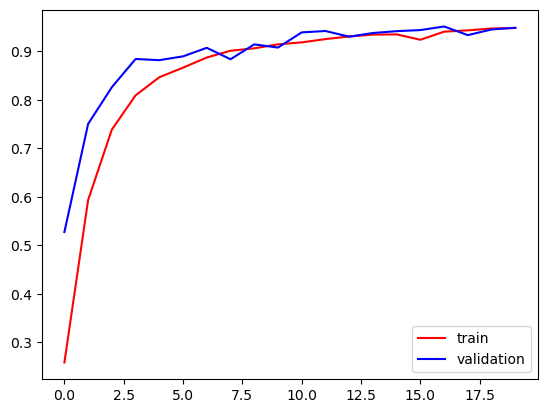

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

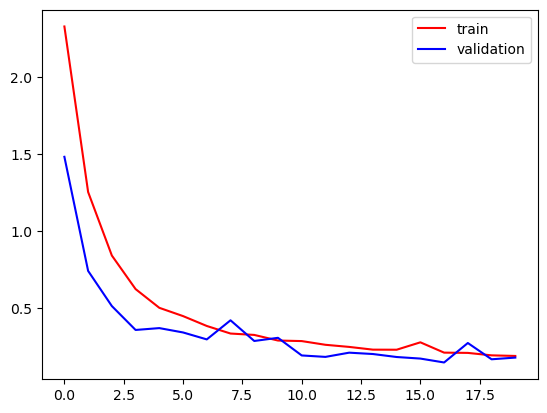

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
model.save('model.h5')

2023-04-14 23:42:54.898673: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 117964800 exceeds 10% of free system memory.
2023-04-14 23:42:55.142817: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 117964800 exceeds 10% of free system memory.
2023-04-14 23:42:55.341564: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 117964800 exceeds 10% of free system memory.


In [26]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in next(valid_generator):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)

ValueError: too many values to unpack (expected 2)

<Figure size 3000x3000 with 0 Axes>

In [17]:
for images, labels in validation_ds.take(1):
    predictions = model.predict(images)

2023-04-08 17:00:05.525008: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 677 of 800
2023-04-08 17:00:07.202953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


In [28]:
for x,y in valid_generator.take(1):
    print(np.max(model.predict(x),axis=1)*100)

AttributeError: 'DirectoryIterator' object has no attribute 'take'

In [ ]:
from tensorflow.keras.models import load_model
import cv2 as cv
model = load_model('model.h5')

In [31]:
path = 'dataset/test/test'
for i in os.listdir(path):
    img = cv.imread(os.path.join(path,i))
    img = img/255
    img = cv.resize(img,(256,256))
    img = img.reshape(1,256,256,3)
    print("actual :"+ i + " Pred : " + class_names[np.argmax(model.predict(img))])
    print("accuracy : ",np.max(model.predict(img)) * 100)

actual :AppleCedarRust1.JPG Pred : Pepper,_bell___healthy
accuracy :  70.5754041671753
actual :AppleCedarRust2.JPG Pred : Blueberry___healthy
accuracy :  98.42200875282288
actual :AppleCedarRust3.JPG Pred : Tomato___Septoria_leaf_spot
accuracy :  33.24514925479889
actual :AppleCedarRust4.JPG Pred : Apple___healthy
accuracy :  85.6158971786499
actual :AppleScab1.JPG Pred : Pepper,_bell___healthy
accuracy :  94.16634440422058
actual :AppleScab2.JPG Pred : Orange___Haunglongbing_(Citrus_greening)
accuracy :  99.93756413459778
actual :AppleScab3.JPG Pred : Soybean___healthy
accuracy :  89.53988552093506
actual :CornCommonRust1.JPG Pred : Tomato___Late_blight
accuracy :  95.7698106765747
actual :CornCommonRust2.JPG Pred : Tomato___Late_blight
accuracy :  85.33758521080017
actual :CornCommonRust3.JPG Pred : Tomato___Late_blight
accuracy :  99.99270439147949
actual :PotatoEarlyBlight1.JPG Pred : Pepper,_bell___healthy
accuracy :  66.13483428955078
actual :PotatoEarlyBlight2.JPG Pred : Potato_

In [60]:
os.listdir(path)

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [36]:
img = cv.imread(os.path.join(path,'AppleCedarRust1.JPG'))
img = cv.resize(img,(256,250))

In [40]:
model.save('model2.h5')